In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
from matplotlib.lines import Line2D
from sklearn.feature_selection import mutual_info_classif
from scipy import stats
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
import plotly.express as px
import plotly.graph_objs as go
import imageio


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        
from warnings import filterwarnings

In [3]:
data = pd.read_csv("heart.csv")
print("Dataset Shape: ", data.shape)
data

Dataset Shape:  (303, 14)


,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [9]:
data = data.rename(columns={
    'age': 'Age',
    'sex': 'Sex',
    'cp': 'ChestPainType',
    'trtbps': 'RestingBP',
    'chol': 'Cholesterol',
    'fbs': 'FastingBS',
    'restecg': 'RestECG',
    'thalachh': 'MaxHR',
    'exang': 'ExerciseAngina',
    'oldpeak': 'STDepression',
    'slope': 'STSlope',
    'ca': 'NumMajorVessels',
    'thal': 'ThalassemiaType',
    'output': 'HeartDisease'
})

# Print the new column names
print(data.columns)

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestECG', 'MaxHR', 'exng', 'STDepression', 'slp', 'caa', 'thall',
       'HeartDisease'],
      dtype='object')


In [12]:
scatter = go.Scatter(
    x=data["Age"],
    y=data["MaxHR"],
    mode="markers",
    marker=dict(
        size=10,
        color=data["HeartDisease"],  # Color based on heart disease (1) or not (0)
        colorscale="Viridis",
        showscale=True,
    ),
    text=data.index,
    hovertemplate=(
        "Age: %{x}<br>"
        "Max Heart Rate: %{y}<br>"
        "Heart Disease: %{marker.color}<br>"
        "<extra></extra>"
    ),
)

layout = go.Layout(
    title="Age vs. Maximum Heart Rate",
    xaxis=dict(title="Age"),
    yaxis=dict(title="Maximum Heart Rate"),
    showlegend=False,
)

fig = go.Figure(data=[scatter], layout=layout)

# Show the interactive plot
fig.show()

In [17]:
gender_count = data.groupby(['Sex', 'HeartDisease']).size().reset_index(name='count')
gender_count['Sex'] = gender_count['Sex'].map({0: 'Female', 1: 'Male'})
gender_count['HeartDisease'] = gender_count['HeartDisease'].map({0: 'No', 1: 'Yes'})

fig = px.bar(gender_count, x='Sex', y='count', color='HeartDisease', 
             barmode='group', title='Count of Heart Disease Patients by Gender',
             labels={'Sex': 'Gender', 'count': 'Count', 'HeartDisease': 'Heart Disease'})

fig.show()

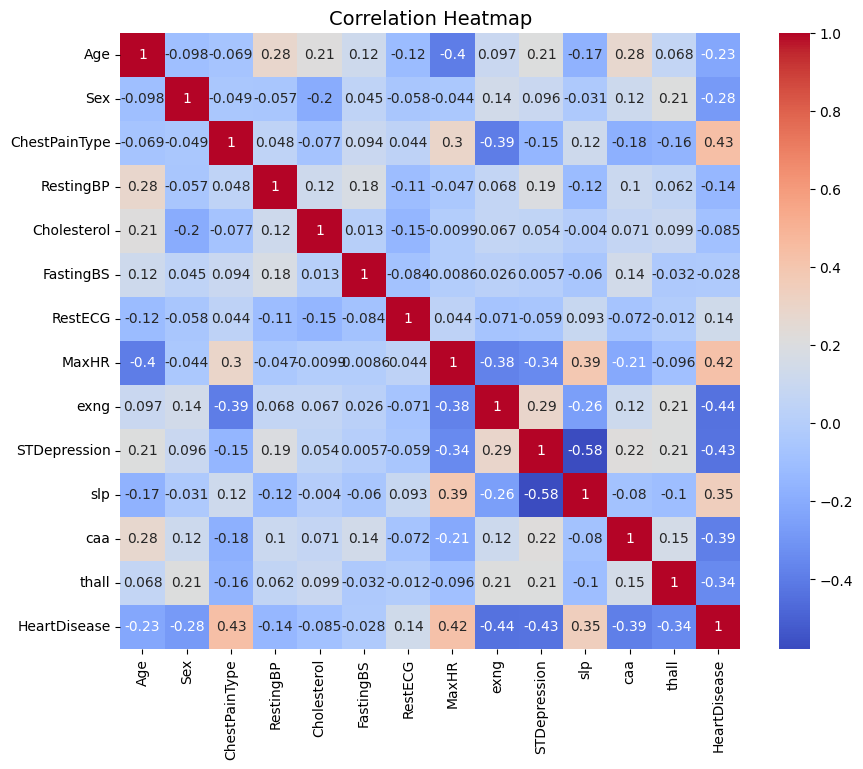

In [18]:
corr = data.corr()

fig, ax = plt.subplots(figsize=(10, 8))

sns.heatmap(corr, annot=True, cmap='coolwarm', ax=ax)

plt.title('Correlation Heatmap', fontsize=14)
plt.show()